In [1]:
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')
print(tf.__version__)

2.4.1


In [2]:
df_train = pd.read_csv(r'C:\Users\anshu\OneDrive\Desktop\hackathon\data\Training Data.csv')
df_test = pd.read_csv(r'C:\Users\anshu\OneDrive\Desktop\hackathon\data\Test Data.csv')
df_sample = pd.read_csv(r'C:\Users\anshu\OneDrive\Desktop\hackathon\Sample Prediction Dataset.csv')

# Working with training data

In [3]:
print(df_train.shape)
df_train.head(50) 

(252000, 13)


,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


In [4]:
df_train.tail(50)

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
251950,251951,2554999,45,0,single,rented,no,Magistrate,Karnal,Haryana,0,10,0
251951,251952,4664428,23,20,single,rented,no,Flight_attendant,Avadi,Tamil_Nadu,10,10,0
251952,251953,6297441,75,18,single,rented,no,Scientist,Morbi,Gujarat,14,12,0
251953,251954,943990,27,0,single,rented,no,Industrial_Engineer,Dhanbad,Jharkhand,0,10,0
251954,251955,977120,45,17,single,rented,yes,Designer,Pondicherry,Puducherry,4,14,0
251955,251956,1661386,38,17,single,rented,yes,Software_Developer,Jodhpur,Rajasthan,6,12,0
251956,251957,8914879,49,4,single,rented,no,Software_Developer,Durg,Chhattisgarh,4,13,0
251957,251958,3570802,73,9,single,rented,no,Engineer,Katihar,Bihar,9,11,1
251958,251959,3719276,38,9,single,rented,no,Chemical_engineer,Pali,Rajasthan,9,13,0
251959,251960,3682210,29,3,single,rented,no,Financial_Analyst,Bhubaneswar,Odisha,3,14,0


In [5]:
df_test.shape

(28000, 12)

<AxesSubplot:>

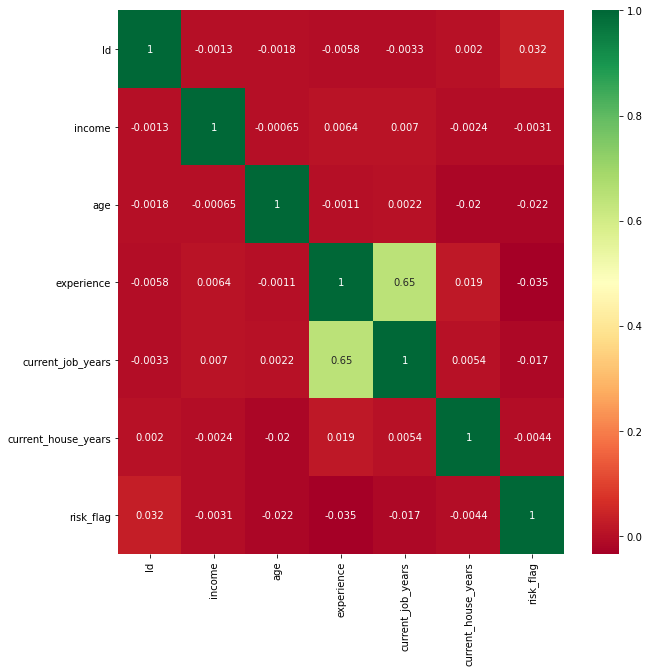

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
sns.heatmap(df_train.corr(), cmap='RdYlGn', annot = True)

##### So from the correleation plot, we can see that 5 columns are very correlated with the risk_flag output dependency.

##### 1) current_job_years
##### 2) age
##### 3) income
##### 4) experience
##### 5) current_house_years

##### Now, In the testing data, we can see that experience and current_job_years are highly correlated. So removing one of them would be better. So now I will remove the 'current_job_years' column from the training part and finalize all my columns as:

##### 1) age
##### 2) income
##### 3) experience
##### 4) current_house_years
##### And these columns will help me classify the risk_flag

In [7]:
df_train.columns

Index(['Id', 'income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'risk_flag'],
      dtype='object')

In [8]:
col = ['Id', 'income', 'age', 'experience', 'current_house_years', 'risk_flag']

In [9]:
df_train_temp = df_train[col]
df_train_temp.head()

,Id,income,age,experience,current_house_years,risk_flag
0,1,1303835,23,3,13,0
1,2,7574516,40,10,13,0
2,3,3991815,66,4,10,0
3,4,6256451,41,2,12,1
4,5,5768871,47,11,14,1


In [10]:
df_train_temp.shape[0] == df_train.shape[0]

True

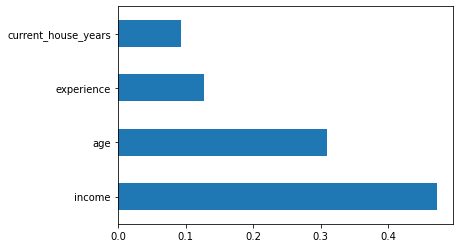

In [11]:
X = df_train_temp.iloc[:, 1:-1]
y = df_train_temp.iloc[:, -1]

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
reg= ExtraTreesRegressor()

reg.fit(X_train,y_train)

reg.feature_importances_

feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [12]:
df_train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


#### 1) age -------------------------------------------------------------------------------------------

In [13]:
df_train_temp.age.describe()

count   252000.0000
mean        49.9541
std         17.0639
min         21.0000
25%         35.0000
50%         50.0000
75%         65.0000
max         79.0000
Name: age, dtype: float64

In [14]:
df_train_temp.age.dtype == df_test.age.dtype

True

In [15]:
df_train.head(50)

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


In [16]:
data = np.asarray([df_train_temp.age])
new_data = data.reshape(-1,1)

scaler = MinMaxScaler(feature_range= (0,1))
scaled = scaler.fit_transform(new_data)

df_train_temp['age'] = scaled

In [17]:
df_train_temp.head(50)

,Id,income,age,experience,current_house_years,risk_flag
0,1,1303835,0.0345,3,13,0
1,2,7574516,0.3276,10,13,0
2,3,3991815,0.7759,4,10,0
3,4,6256451,0.3448,2,12,1
4,5,5768871,0.4483,11,14,1
5,6,6915937,0.7414,0,12,0
6,7,3954973,0.6379,14,12,0
7,8,1706172,0.2069,2,14,0
8,9,7566849,0.0517,17,11,0
9,10,8964846,0.0345,12,13,0


#### 2) income

In [18]:
df_train_temp.income.describe()

count    252000.0000
mean    4997116.6653
std     2878311.0136
min       10310.0000
25%     2503015.0000
50%     5000694.5000
75%     7477502.0000
max     9999938.0000
Name: income, dtype: float64

In [19]:
df_train_temp.income.isnull().sum()

0

In [20]:
data = np.asarray([df_train_temp['income']])
new_data = data.reshape(-1,1)

scaler = MinMaxScaler(feature_range= (0,1))
scaled = scaler.fit_transform(new_data)
print(scaled)

[[0.1294868 ]
 [0.75720597]
 [0.39856389]
 ...
 [0.45168228]
 [0.65035635]
 [0.90693267]]


In [21]:
df_train_temp['income'] = scaled

In [22]:
df_train_temp.head()

,Id,income,age,experience,current_house_years,risk_flag
0,1,0.1295,0.0345,3,13,0
1,2,0.7572,0.3276,10,13,0
2,3,0.3986,0.7759,4,10,0
3,4,0.6253,0.3448,2,12,1
4,5,0.5765,0.4483,11,14,1


#### 3) experience

In [23]:
df_train_temp.experience.describe()

count   252000.0000
mean        10.0844
std          6.0026
min          0.0000
25%          5.0000
50%         10.0000
75%         15.0000
max         20.0000
Name: experience, dtype: float64

In [24]:
data = np.asarray([df_train_temp.experience])
new_data = data.reshape(-1,1)

scaler = MinMaxScaler(feature_range= (0,1))
scaled = scaler.fit_transform(new_data)

df_train_temp['experience'] = scaled

In [25]:
df_train_temp.head()

,Id,income,age,experience,current_house_years,risk_flag
0,1,0.1295,0.0345,0.1500,13,0
1,2,0.7572,0.3276,0.5000,13,0
2,3,0.3986,0.7759,0.2000,10,0
3,4,0.6253,0.3448,0.1000,12,1
4,5,0.5765,0.4483,0.5500,14,1


##### 4) current_house_years

In [26]:
df_train_temp.current_house_years.describe()

count   252000.0000
mean        11.9978
std          1.3990
min         10.0000
25%         11.0000
50%         12.0000
75%         13.0000
max         14.0000
Name: current_house_years, dtype: float64

In [27]:
data = np.asarray([df_train_temp.current_house_years])
new_data = data.reshape(-1,1)

scaler = MinMaxScaler(feature_range= (0,1))
scaled = scaler.fit_transform(new_data)

df_train_temp['current_house_years'] = scaled

In [28]:
df_train_temp.head(20)

,Id,income,age,experience,current_house_years,risk_flag
0,1,0.1295,0.0345,0.1500,0.7500,0
1,2,0.7572,0.3276,0.5000,0.7500,0
2,3,0.3986,0.7759,0.2000,0.0000,0
3,4,0.6253,0.3448,0.1000,0.5000,1
4,5,0.5765,0.4483,0.5500,1.0000,1
5,6,0.6913,0.7414,0.0000,0.5000,0
6,7,0.3949,0.6379,0.7000,0.5000,0
7,8,0.1698,0.2069,0.1000,1.0000,0
8,9,0.7564,0.0517,0.8500,0.2500,0
9,10,0.8964,0.0345,0.6000,0.7500,0


##### Dependent feature -----> 'risk_flag'

In [29]:
df_train_temp.risk_flag.value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

<AxesSubplot:xlabel='risk_flag', ylabel='count'>

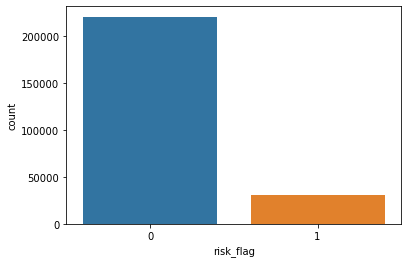

In [30]:
sns.countplot(x = df_train_temp.risk_flag)

In [31]:
# there is a problem with our data as it is highly imbalanced.

x = df_train_temp['risk_flag'].value_counts()[0]
y = df_train_temp['risk_flag'].value_counts()[1]

print(x , ":", y)



221004 : 30996


In [32]:
print(x/y)

7.130081300813008


### Now we will solve this problem

In [33]:
df_train_temp.head()

,Id,income,age,experience,current_house_years,risk_flag
0,1,0.1295,0.0345,0.1500,0.7500,0
1,2,0.7572,0.3276,0.5000,0.7500,0
2,3,0.3986,0.7759,0.2000,0.0000,0
3,4,0.6253,0.3448,0.1000,0.5000,1
4,5,0.5765,0.4483,0.5500,1.0000,1


In [34]:
df_train_temp.tail()

,Id,income,age,experience,current_house_years,risk_flag
251995,251996,0.8153,0.3793,0.6500,0.2500,0
251996,251997,0.2836,0.0862,0.5000,0.2500,0
251997,251998,0.4517,0.4310,0.3500,0.5000,0
251998,251999,0.6504,0.4138,0.0000,0.0000,0
251999,252000,0.9069,0.8448,0.8500,0.2500,0


### Division of data

##### Case 1 with 0.33 division

In [35]:
train_size_case_1 = df_train_temp.iloc[:164150, :]
test_size_case_1 = df_train_temp.iloc[164150:245000, :]
deploy_size_case_1 = df_train_temp.iloc[245000:, :]


print(train_size_case_1.shape, test_size_case_1.shape, deploy_size_case_1.shape)

(164150, 6) (80850, 6) (7000, 6)


##### case2 with 0.2 division

In [36]:
train_size_case_2 = df_train_temp.iloc[:196000, :]
test_size_case_2 = df_train_temp.iloc[196000:245000, :]
deploy_size_case_2 = df_train_temp.iloc[245000:, :]


print(train_size_case_2.shape, test_size_case_2.shape, deploy_size_case_2.shape)

(196000, 6) (49000, 6) (7000, 6)


In [37]:
# train_size_case_2.head()

# Case 1

In [38]:
X_train = train_size_case_1.iloc[:, 1:-1]
y_train = train_size_case_1.iloc[:, -1]
X_test = test_size_case_1.iloc[:, 1:-1]
y_test = test_size_case_1.iloc[:, -1]


### 1) without any imabalanced techniques:

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[69398     0]
 [11452     0]]
69398 0 11452 0
0.8583549783549783
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     69398
           1       0.00      0.00      0.00     11452

    accuracy                           0.86     80850
   macro avg       0.43      0.50      0.46     80850
weighted avg       0.74      0.86      0.79     80850



In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test, y_pred)

print('ROC AUC=%.4f' % (ns_auc))

ROC AUC=0.5000


In [41]:
print(tp/(tp+fn))

0.0


#### 2) oversampling

In [42]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from collections import Counter


os=RandomOverSampler(0.75)
X_train_os,y_train_os=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

classifier_1=RandomForestClassifier()
classifier_1.fit(X_train_os,y_train_os)


y_pred=classifier_1.predict(X_test)
print('\n')
print(confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)
print('\n')
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

The number of classes before fit Counter({0: 146011, 1: 18139})
The number of classes after fit Counter({0: 146011, 1: 109508})


[[63729  5669]
 [ 5617  5835]]
63729 5669 5617 5835


0.8604081632653061
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     69398
           1       0.51      0.51      0.51     11452

    accuracy                           0.86     80850
   macro avg       0.71      0.71      0.71     80850
weighted avg       0.86      0.86      0.86     80850



In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test, y_pred)

print('ROC AUC=%.4f' % (ns_auc))

ROC AUC=0.7139


In [44]:
print(tp/(tp+fn))

0.5095179881243451


####  Oversampling With different classifiers

# RandomForestClassifier

In [45]:
model01 = RandomForestClassifier(n_estimators = 100, class_weight=None, criterion='gini', max_depth=5,
            max_features="auto", max_leaf_nodes=10, min_samples_leaf=50,
            min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=50, n_jobs = -1, oob_score = True)


model01.fit(X_train_os,y_train_os)
y_pred=model01.predict(X_test)

print('\n')
print(confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)
print('\n')
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test, y_pred)

print('ROC AUC=%.4f' % (ns_auc))



[[66823  2575]
 [10764   688]]
66823 2575 10764 688


0.8350154607297464
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     69398
           1       0.21      0.06      0.09     11452

    accuracy                           0.84     80850
   macro avg       0.54      0.51      0.50     80850
weighted avg       0.77      0.84      0.79     80850

ROC AUC=0.5115


In [46]:
print(tp/(tp+fn))

0.06007684247293049


# DecisionTreeClassifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
model02 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=None, splitter='random')




model02.fit(X_train_os,y_train_os)

y_pred=model02.predict(X_test)

print('\n')
print(confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)
print('\n')
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



[[67538  1860]
 [11001   451]]
67538 1860 11001 451


0.8409276437847867
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     69398
           1       0.20      0.04      0.07     11452

    accuracy                           0.84     80850
   macro avg       0.53      0.51      0.49     80850
weighted avg       0.77      0.84      0.79     80850



In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test, y_pred)

print('ROC AUC=%.4f' % (ns_auc))

ROC AUC=0.5063


In [49]:
print(tp/(tp+fn))

0.0393817673768774


# MultinomialNB

In [50]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_os,y_train_os)

y_pred=mnb.predict(X_test)

print('\n')
print(confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)
print('\n')
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



[[69398     0]
 [11452     0]]
69398 0 11452 0


0.8583549783549783
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     69398
           1       0.00      0.00      0.00     11452

    accuracy                           0.86     80850
   macro avg       0.43      0.50      0.46     80850
weighted avg       0.74      0.86      0.79     80850



In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test, y_pred)

print('ROC AUC=%.4f' % (ns_auc))

ROC AUC=0.5000


In [52]:
print(tp/(tp+fn))

0.0


# Catboost

In [53]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

params = {'iterations': 500,
          'learning_rate': 0.1,
          'eval_metric': 'Accuracy',
          'random_seed': 42,
          'logging_level': 'Silent',
          'use_best_model': True}


categorical_feature_indices = np.where(X_train_os.dtypes != np.float)[0]

train_pool = Pool(X_train_os, y_train_os, cat_features = categorical_feature_indices)
test_pool = Pool(X_test, y_test, cat_features = categorical_feature_indices)

model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=test_pool)


y_pred=model.predict(X_test)

print('\n')
print(confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)
print('\n')
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



[[65535  3863]
 [10132  1320]]
65535 3863 10132 1320


0.8269016697588126
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     69398
           1       0.25      0.12      0.16     11452

    accuracy                           0.83     80850
   macro avg       0.56      0.53      0.53     80850
weighted avg       0.78      0.83      0.80     80850



In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test, y_pred)

print('ROC AUC=%.4f' % (ns_auc))

ROC AUC=0.5298


In [55]:
print(tp/(tp+fn))

0.11526370939573874


# Passive aggressive classifier

In [56]:
from sklearn.linear_model import PassiveAggressiveClassifier

clf_passive = PassiveAggressiveClassifier(max_iter=1000, random_state=42, tol=1e-3)

clf_passive.fit(X_train_os,y_train_os)

y_pred=clf_passive.predict(X_test)

print('\n')
print(confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)
print('\n')
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



[[68335  1063]
 [11203   249]]
68335 1063 11203 249


0.848286951144094
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     69398
           1       0.19      0.02      0.04     11452

    accuracy                           0.85     80850
   macro avg       0.52      0.50      0.48     80850
weighted avg       0.76      0.85      0.79     80850



In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test, y_pred)

print('ROC AUC=%.4f' % (ns_auc))

ROC AUC=0.5032


In [58]:
print(tp/(tp+fn))

0.021742926999650716


#### 3) SMOTETomek

In [59]:
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier

st=SMOTETomek(0.75)
X_train_ns,y_train_ns=st.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

classifier_2=RandomForestClassifier()
classifier_2.fit(X_train_ns,y_train_ns)


y_pred=classifier_2.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

The number of classes before fit Counter({0: 146011, 1: 18139})
The number of classes after fit Counter({0: 146011, 1: 109508})
[[63677  5721]
 [ 5605  5847]]
0.85991341991342
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     69398
           1       0.51      0.51      0.51     11452

    accuracy                           0.86     80850
   macro avg       0.71      0.71      0.71     80850
weighted avg       0.86      0.86      0.86     80850



In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test, y_pred)

print('ROC AUC=%.4f' % (ns_auc))

ROC AUC=0.7141


In [61]:
print(tp/(tp+fn))

0.021742926999650716


#### 4) Ensemble Techniques

In [62]:
from imblearn.ensemble import EasyEnsembleClassifier

easy=EasyEnsembleClassifier()
easy.fit(X_train,y_train)

y_pred=easy.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[41725 27673]
 [ 6157  5295]]
0.5815708101422387
              precision    recall  f1-score   support

           0       0.87      0.60      0.71     69398
           1       0.16      0.46      0.24     11452

    accuracy                           0.58     80850
   macro avg       0.52      0.53      0.47     80850
weighted avg       0.77      0.58      0.64     80850



In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test, y_pred)

print('ROC AUC=%.4f' % (ns_auc))

ROC AUC=0.5318


In [64]:
print(tp/(tp+fn))

0.021742926999650716


# CASE 2

In [65]:
# # train_size_case_2 = df_train_temp.iloc[:184800, :]
# # test_size_case_2 = df_train_temp.iloc[184800:224000, :]
# # deploy_size_case_2 = df_train_temp.iloc[224000:, :]

print(train_size_case_2.shape, test_size_case_2.shape, deploy_size_case_2.shape)

(196000, 6) (49000, 6) (7000, 6)


In [66]:
X_train_2 = train_size_case_2.iloc[:, 1:-1]
y_train_2 = train_size_case_2.iloc[:, -1]
X_test_2 = test_size_case_2.iloc[:, 1:-1]
y_test_2 = test_size_case_2.iloc[:, -1]

# X_train_2, y_train_2, X_test_2, y_test_2

#### 1) nosampling

In [67]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

clf_2=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf_2.fit(X_train_2,y_train_2)

y_pred=clf_2.predict(X_test_2)
print(confusion_matrix(y_test_2,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test_2,y_pred).ravel()
print(tn, fp, fn, tp)
print(accuracy_score(y_test_2,y_pred))
print(classification_report(y_test_2,y_pred))

print(tp/(tp+fn))

[[40435     0]
 [ 8565     0]]
40435 0 8565 0
0.825204081632653
              precision    recall  f1-score   support

           0       0.83      1.00      0.90     40435
           1       0.00      0.00      0.00      8565

    accuracy                           0.83     49000
   macro avg       0.41      0.50      0.45     49000
weighted avg       0.68      0.83      0.75     49000

0.0


In [68]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test_2, y_pred)

print('ROC AUC=%.4f' % (ns_auc))

ROC AUC=0.5000


#### 3) oversampling + rf

In [69]:
os=RandomOverSampler(0.75)
X_train_os,y_train_os=os.fit_resample(X_train_2,y_train_2)
print("The number of classes before fit {}".format(Counter(y_train_2)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

classifier_12=RandomForestClassifier()
classifier_12.fit(X_train_os,y_train_os)

y_pred=classifier_12.predict(X_test_2)
print('\n')
print(confusion_matrix(y_test_2,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test_2,y_pred).ravel()
print(tn, fp, fn, tp)
print('\n')
print(accuracy_score(y_test_2,y_pred))
print(classification_report(y_test_2,y_pred))

print(tp/(tp+fn))

# # X_train_2, y_train_2, X_test_2, y_test_2

The number of classes before fit Counter({0: 174974, 1: 21026})
The number of classes after fit Counter({0: 174974, 1: 131230})


[[38103  2332]
 [ 5599  2966]]
38103 2332 5599 2966


0.8381428571428572
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     40435
           1       0.56      0.35      0.43      8565

    accuracy                           0.84     49000
   macro avg       0.72      0.64      0.67     49000
weighted avg       0.82      0.84      0.82     49000

0.3462930531231757


In [70]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test_2, y_pred)

print('ROC AUC=%.4f' % (ns_auc))

ROC AUC=0.6443


#### + hp rf

In [71]:
model012 = RandomForestClassifier(n_estimators = 100, class_weight=None, criterion='gini', max_depth=5,
            max_features="auto", max_leaf_nodes=10, min_samples_leaf=50,
            min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=50, n_jobs = -1, oob_score = True)

model012.fit(X_train_os,y_train_os)

y_pred=model012.predict(X_test_2)

print('\n')
print(confusion_matrix(y_test_2,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test_2,y_pred).ravel()
print(tn, fp, fn, tp)
print('\n')
print(accuracy_score(y_test_2,y_pred))
print(classification_report(y_test_2,y_pred))

print(tp/(tp+fn))
# X_train_2, y_train_2, X_test_2, y_test_2



[[39258  1177]
 [ 8234   331]]
39258 1177 8234 331


0.8079387755102041
              precision    recall  f1-score   support

           0       0.83      0.97      0.89     40435
           1       0.22      0.04      0.07      8565

    accuracy                           0.81     49000
   macro avg       0.52      0.50      0.48     49000
weighted avg       0.72      0.81      0.75     49000

0.0386456509048453


In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test_2, y_pred)

print('ROC AUC=%.4f' % (ns_auc))

ROC AUC=0.5048


#### + dt

In [73]:
from sklearn.tree import DecisionTreeClassifier

model023 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=None, splitter='random')

model023.fit(X_train_os,y_train_os)

y_pred=model023.predict(X_test_2)

print('\n')
print(confusion_matrix(y_test_2,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test_2,y_pred).ravel()
print(tn, fp, fn, tp)
print('\n')
print(accuracy_score(y_test_2,y_pred))
print(classification_report(y_test_2,y_pred))

print(tp/(tp+fn))

# # X_train_2, y_train_2, X_test_2, y_test_2



[[38911  1524]
 [ 8204   361]]
38911 1524 8204 361


0.801469387755102
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     40435
           1       0.19      0.04      0.07      8565

    accuracy                           0.80     49000
   macro avg       0.51      0.50      0.48     49000
weighted avg       0.71      0.80      0.75     49000

0.04214827787507297


In [74]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test_2, y_pred)

print('ROC AUC=%.4f' % (ns_auc))

ROC AUC=0.5022


#### + nb

In [75]:
from sklearn.naive_bayes import MultinomialNB

mnb_2 = MultinomialNB()
mnb_2.fit(X_train_os,y_train_os)

y_pred=mnb_2.predict(X_test_2)

print('\n')
print(confusion_matrix(y_test_2,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test_2,y_pred).ravel()
print(tn, fp, fn, tp)
print('\n')
print(accuracy_score(y_test_2,y_pred))
print(classification_report(y_test_2,y_pred))

print(tp/(tp+fn))

# # X_train_2, y_train_2, X_test_2, y_test_2



[[40435     0]
 [ 8565     0]]
40435 0 8565 0


0.825204081632653
              precision    recall  f1-score   support

           0       0.83      1.00      0.90     40435
           1       0.00      0.00      0.00      8565

    accuracy                           0.83     49000
   macro avg       0.41      0.50      0.45     49000
weighted avg       0.68      0.83      0.75     49000

0.0


In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test_2, y_pred)

print('ROC AUC=%.4f' % (ns_auc))

ROC AUC=0.5000


#### + catboost

In [77]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

params = {'iterations': 500,
          'learning_rate': 0.1,
          'eval_metric': 'Accuracy',
          'random_seed': 42,
          'logging_level': 'Silent',
          'use_best_model': True}


categorical_feature_indices = np.where(X_train_os.dtypes != np.float)[0]

train_pool = Pool(X_train_os, y_train_os, cat_features = categorical_feature_indices)
test_pool = Pool(X_test_2, y_test_2, cat_features = categorical_feature_indices)

model_22 = CatBoostClassifier(**params)
model_22.fit(train_pool, eval_set=test_pool)


y_pred=model_22.predict(X_test_2)

print('\n')
print(confusion_matrix(y_test_2,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test_2,y_pred).ravel()
print(tn, fp, fn, tp)
print('\n')
print(accuracy_score(y_test_2,y_pred))
print(classification_report(y_test_2,y_pred))


print(tp/(tp+fn))

# # X_train_2, y_train_2, X_test_2, y_test_2



[[38223  2212]
 [ 7898   667]]
38223 2212 7898 667


0.7936734693877551
              precision    recall  f1-score   support

           0       0.83      0.95      0.88     40435
           1       0.23      0.08      0.12      8565

    accuracy                           0.79     49000
   macro avg       0.53      0.51      0.50     49000
weighted avg       0.72      0.79      0.75     49000

0.07787507297139522


In [78]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test_2, y_pred)

print('ROC AUC=%.4f' % (ns_auc))

ROC AUC=0.5116


#### 4) SMOTE

In [79]:
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier

st=SMOTETomek(0.75)
X_train_ns,y_train_ns=st.fit_resample(X_train_2,y_train_2)
print("The number of classes before fit {}".format(Counter(y_train_2)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))


classifier_22=RandomForestClassifier()
classifier_22.fit(X_train_ns,y_train_ns)


y_pred=classifier_22.predict(X_test_2)
print(confusion_matrix(y_test_2,y_pred))

tn, fp, fn, tp = confusion_matrix(y_test_2,y_pred).ravel()
print(tn, fp, fn, tp)
print(accuracy_score(y_test_2,y_pred))
print(classification_report(y_test_2,y_pred))

print(tp/(tp+fn))

# # X_train_2, y_train_2, X_test_2, y_test_2

The number of classes before fit Counter({0: 174974, 1: 21026})
The number of classes after fit Counter({0: 174974, 1: 131230})
[[38043  2392]
 [ 5592  2973]]
38043 2392 5592 2973
0.8370612244897959
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     40435
           1       0.55      0.35      0.43      8565

    accuracy                           0.84     49000
   macro avg       0.71      0.64      0.67     49000
weighted avg       0.82      0.84      0.82     49000

0.34711033274956216


In [80]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test_2, y_pred)

print('ROC AUC=%.4f' % (ns_auc))

ROC AUC=0.6440


## Deploying on the deployment data

### UNderstand and viusalize our test data

In [ ]:
# os=RandomOverSampler(0.75)
# X_train_os,y_train_os=os.fit_resample(X_train,y_train)
# print("The number of classes before fit {}".format(Counter(y_train)))
# print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [81]:
print(deploy_size_case_1.shape)
print(len(deploy_size_case_1))

X = deploy_size_case_1.iloc[:, 1:-1]
y = deploy_size_case_1.iloc[:, -1]

(7000, 6)
7000


In [90]:
classifier_1

RandomForestClassifier()

In [92]:
# put the model

y_pred=classifier_1.predict(X)
print('\n')
print(confusion_matrix(y,y_pred))
tn, fp, fn, tp = confusion_matrix(y,y_pred).ravel()
print(tn, fp, fn, tp)
print('\n')
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculate scores
ns_auc = roc_auc_score(y, y_pred)

print('ROC AUC=%.4f' % (ns_auc))



[[5325  270]
 [1325   80]]
5325 270 1325 80


0.7721428571428571
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      5595
           1       0.23      0.06      0.09      1405

    accuracy                           0.77      7000
   macro avg       0.51      0.50      0.48      7000
weighted avg       0.69      0.77      0.71      7000

ROC AUC=0.5043


### Final Deployment

In [94]:
df_test.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [95]:
col = ['income', 'age', 'experience', 'current_house_years']
df_test_temp = df_test[col]

df_test_temp.head()

,income,age,experience,current_house_years
0,7393090,59,19,13
1,1215004,25,5,10
2,8901342,50,12,14
3,1944421,49,9,12
4,13429,25,18,11


In [96]:
df_test_temp.shape

(28000, 4)

In [ ]:
# scaling all of them

In [97]:
data = np.asarray([df_test_temp.income])
new_data = data.reshape(-1,1)

scaler = MinMaxScaler(feature_range= (0,1))
scaled = scaler.fit_transform(new_data)

df_test_temp['income'] = scaled

In [98]:
data = np.asarray([df_test_temp.age])
new_data = data.reshape(-1,1)

scaler = MinMaxScaler(feature_range= (0,1))
scaled = scaler.fit_transform(new_data)

df_test_temp['age'] = scaled

In [99]:
data = np.asarray([df_test_temp.current_house_years])
new_data = data.reshape(-1,1)

scaler = MinMaxScaler(feature_range= (0,1))
scaled = scaler.fit_transform(new_data)

df_test_temp['current_house_years'] = scaled

In [100]:
data = np.asarray([df_test_temp.experience])
new_data = data.reshape(-1,1)

scaler = MinMaxScaler(feature_range= (0,1))
scaled = scaler.fit_transform(new_data)

df_test_temp['experience'] = scaled

In [101]:
df_test_temp.head()

,income,age,experience,current_house_years
0,0.7391,0.6552,0.9500,0.7500
1,0.1206,0.0690,0.2500,0.0000
2,0.8900,0.5000,0.6000,1.0000
3,0.1936,0.4828,0.4500,0.5000
4,0.0003,0.0690,0.9000,0.2500


In [102]:
df_test_temp.shape

(28000, 4)

In [103]:
y_pred_final = classifier_1.predict(df_test_temp)

# print('\n')
# print(confusion_matrix(y_test,y_pred_final))
# tn, fp, fn, tp = confusion_matrix(y_test,y_pred_final).ravel()
# print(tn, fp, fn, tp)
# print('\n')
# print(accuracy_score(y_test,y_pred_final))
# print(classification_report(y_test,y_pred_final))

In [104]:
count = 0
for i in y_pred_final:
    if i == 0:
        count += 1
        
print(count)

23037


In [105]:
count = 0
for i in y_pred_final:
    if i == 1:
        count += 1
        
print(count)

4963


In [106]:
y_pred_final

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

## making the submission

In [108]:
submission = pd.DataFrame()
submission['id'] = df_test['id']
submission['risk_flag'] = y_pred_final # our model predictions on the test dataset
submission.head(20)

,id,risk_flag
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [109]:
submission['risk_flag'] = submission['risk_flag'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [110]:
if len(submission) == len(df_test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submitted.")

Submission dataframe is the same length as test (28000 rows).


In [111]:
submission.to_csv(r'C:\Users\anshu\OneDrive\Desktop\hackathon/submission_2.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!
